In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score

# Exercise 1

In this dataset, we are going to predict the salary of Major League Baseball players in US
depending on several parameters. The dataset can be downloaded and is described on the
following website : https://www.kaggle.com/floser/hitters
We shall compare dierent version of the linear model to solve this regression task.

1. We first import and preprocess the data

(a) Import the data. Remove missing values using the function dropna() of the library
pandas to obtain the dataframe df clean

In [2]:
df = pd.read_csv(fr'C:\Users\belen\Desktop\Université de Lorraine\Second semester\Machine_learning\Lab_2\Data_lab_2_hitters.csv')

In [3]:
df_clean = df.dropna()
df_clean.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


(b) Display the columns corresponding to the features `League', `Division' and
`NewLeague'. What do you see? Transform these categorical variables into indi-
cators
Hint : see https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get dummies.html

In [4]:
df = pd.get_dummies(data=df_clean, columns=['League','Division','NewLeague'], dtype=int)

In [5]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,PutOuts,Assists,Errors,Salary,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,...,632,43,10,475.0,0,1,0,1,0,1
2,479,130,18,66,72,76,3,1624,457,63,...,880,82,14,480.0,1,0,0,1,1,0
3,496,141,20,65,78,37,11,5628,1575,225,...,200,11,3,500.0,0,1,1,0,0,1
4,321,87,10,39,42,30,2,396,101,12,...,805,40,4,91.5,0,1,1,0,0,1
5,594,169,4,74,51,35,11,4408,1133,19,...,282,421,25,750.0,1,0,0,1,1,0


(c) We now dene features and target. Comment the following code
X = df clean.drop(['Salary', 'League', 'Division', 'NewLeague'], axis
= 1).astype('float64')
X = pd.concat([X , dummies[['League N', 'Division W', 'NewLeague N']]],
axis = 1)
y = df clean.Salary
Split data into train and test.

In [6]:
#dummies = df[['League_N', 'Division_W','NewLeague_N']]

In [7]:
#This first line of code is unnecesary, it was already dropped and they no longer exist
#X_ = df.drop(['Salary'], axis=1).astype('float64')
#X = pd.concat([X_, dummies[['League_N','Division_W','NewLeague_N']]])
#y = df.Salary

In [8]:
X = df.drop(['Salary'], axis=1).astype('float64')
y = df_clean.Salary

In [9]:
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (263, 22)
Shape of y: (263,)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2. Fit a classical linear regression on the train set. Display the coecient of the regression
and calculate the r2 score on the test set. Comment

In [11]:
# Fit a classical linear regression on the train set
model = LinearRegression()
model.fit(X_train, y_train)

# Display the coefficients of the regression
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Calculate the R² score on the test set
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R² score:", r2)

Coefficients: [ -1.47860426   7.42224568   4.78627278  -2.85431685  -1.44287843
   5.55339665   8.05732218  -0.23033979   0.1090716   -0.46995038
   1.68726644   0.94159355  -0.82058343   0.24792744   0.22591792
  -0.65087228 -53.98051636  53.98051636  56.92193538 -56.92193538
  31.87545033 -31.87545033]
Intercept: -18.43311817605695
R² score: 0.29074518557981566


3. We now improve OLS with ridge regression

(a) Fit a ridge regression on the training data with hyperparameter  = 4. Display
the coecient of the regression and calculate the r2 score on the test set.

In [12]:
# Fit a ridge regression on the training data with alpha = 4
ridge_model_4 = Ridge(alpha=4)
ridge_model_4.fit(X_train, y_train)

# Display the coefficients of the regression
coefficients_4 = ridge_model_4.coef_
intercept_4 = ridge_model_4.intercept_
print("Ridge Regression with alpha = 4")
print("Coefficients:", coefficients_4)
print("Intercept:", intercept_4)

# Calculate the R² score on the test set
y_pred_4 = ridge_model_4.predict(X_test)
r2_4 = r2_score(y_test, y_pred_4)
print("R² score:", r2_4)

Ridge Regression with alpha = 4
Coefficients: [ -1.49766848   7.46291502   4.70147919  -2.85767194  -1.3971057
   5.54441575   7.8367818   -0.22663578   0.08786124  -0.50935684
   1.69607703   0.95710166  -0.81539222   0.24853018   0.2246762
  -0.61878854 -44.17477052  44.17477052  54.60981532 -54.60981532
  22.63735798 -22.63735798]
Intercept: -15.642060491960592
R² score: 0.2943568454221328


(b) Same with  = 20. Compare

In [13]:
# Fit a ridge regression on the training data with alpha = 20
ridge_model_20 = Ridge(alpha=20)
ridge_model_20.fit(X_train, y_train)

# Display the coefficients of the regression
coefficients_20 = ridge_model_20.coef_
intercept_20 = ridge_model_20.intercept_
print("Ridge Regression with alpha = 20")
print("Coefficients:", coefficients_20)
print("Intercept:", intercept_20)

# Calculate the R² score on the test set
y_pred_20 = ridge_model_20.predict(X_test)
r2_20 = r2_score(y_test, y_pred_20)
print("R² score:", r2_20)


Ridge Regression with alpha = 20
Coefficients: [-1.54224123e+00  7.54062627e+00  4.36949261e+00 -2.83586031e+00
 -1.23249027e+00  5.51843961e+00  7.25631496e+00 -2.19720195e-01
  4.31777345e-02 -5.93680774e-01  1.72393716e+00  9.89317496e-01
 -8.05538878e-01  2.50128188e-01  2.22997283e-01 -6.09286019e-01
 -2.75589363e+01  2.75589363e+01  4.70468289e+01 -4.70468289e+01
  7.73715578e+00 -7.73715578e+00]
Intercept: -9.7951873732668
R² score: 0.29958198388361057


(c) We now allow  to vary from 5  10􀀀4 to 5  103. Display the coecient of the
regression and calculate the r2 score on the test set. Comment

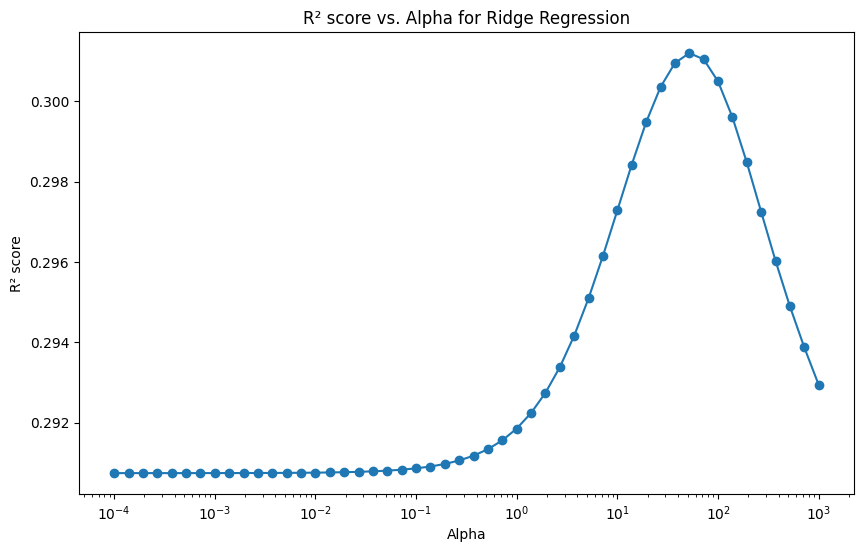

In [14]:
# Define a range of alpha values
alphas = np.logspace(-4, 3, 50)
r2_scores = []

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    y_pred = ridge_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

# Plot the R² scores against alpha values
plt.figure(figsize=(10, 6))
plt.plot(alphas, r2_scores, marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('R² score')
plt.title('R² score vs. Alpha for Ridge Regression')
plt.show()

4. We now improve OLS with lasso

(a) Fit a lasso regression on the training data allowing the hyperparameter  to vary
from 5  10􀀀4 to 5. Display the coecient

In [15]:
# Define a range of alpha values
alphas = np.logspace(-4, np.log10(5), 50)
lasso_r2_scores = []
best_alpha = None
best_r2 = -np.inf

for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    y_pred = lasso_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    lasso_r2_scores.append(r2)
    
    # Check if this alpha gives the best R² score
    if r2 > best_r2:
        best_r2 = r2
        best_alpha = alpha

# Display the best alpha and corresponding R² score
print(f"Best alpha: {best_alpha}")
print(f"Best R² score: {best_r2}")

# Fit Lasso regression with the best alpha
best_lasso_model = Lasso(alpha=best_alpha)
best_lasso_model.fit(X_train, y_train)

# Display the coefficients of the regression
coefficients_lasso = best_lasso_model.coef_
intercept_lasso = best_lasso_model.intercept_
print("Lasso Regression with best alpha")
print("Coefficients:", coefficients_lasso)
print("Intercept:", intercept_lasso)
print("R² score:", best_r2)

c:\Users\belen\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.944e+06, tolerance: 4.367e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\belen\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.944e+06, tolerance: 4.367e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\belen\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.944e+06, toleranc

Best alpha: 5.000000000000001
Best R² score: 0.3033346152161104
Lasso Regression with best alpha
Coefficients: [-1.52975532e+00  7.25634123e+00  3.23916581e+00 -2.45426021e+00
 -8.67817375e-01  5.36811065e+00  6.08198237e+00 -2.32207633e-01
  1.60574823e-01 -3.61040868e-01  1.60105154e+00  8.97442354e-01
 -7.57073295e-01  2.49843482e-01  2.17049356e-01 -4.15931946e-01
 -3.10384135e+01  1.29927815e-14  9.17855889e+01 -5.79255121e-12
 -0.00000000e+00  0.00000000e+00]
Intercept: -32.49013910029964
R² score: 0.3033346152161104


c:\Users\belen\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.855e+06, tolerance: 4.367e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\belen\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.855e+06, tolerance: 4.367e+03
  model = cd_fast.enet_coordinate_descent(


(b) Use now cross-validation to thune . Comment
Hint : see https://scikit-learn.org/stable/modules/generated/sklearn.linear model.LassoCV.html

In [16]:
# Use cross-validation to tune alpha
lasso_cv = LassoCV(alphas=alphas, cv=5)
lasso_cv.fit(X_train, y_train)

# Best alpha found by cross-validation
best_alpha_cv = lasso_cv.alpha_
print(f"Best alpha found by cross-validation: {best_alpha_cv}")

# Calculate the R² score on the test set
y_pred_cv = lasso_cv.predict(X_test)
r2_cv = r2_score(y_test, y_pred_cv)
print("R² score with cross-validated alpha:", r2_cv)

# Display the coefficients of the regression
coefficients_lasso_cv = lasso_cv.coef_
intercept_lasso_cv = lasso_cv.intercept_
print("Lasso Regression with cross-validated alpha")
print("Coefficients:", coefficients_lasso_cv)
print("Intercept:", intercept_lasso_cv)

c:\Users\belen\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5831311.887978365, tolerance: 3170.8085667635
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\belen\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4909152.2119103, tolerance: 3170.8085667635
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\belen\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7310.503041289747, tolerance: 3170.8085667635
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\belen\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: Convergenc

Best alpha found by cross-validation: 5.000000000000001
R² score with cross-validated alpha: 0.3033346152161104
Lasso Regression with cross-validated alpha
Coefficients: [-1.52975532e+00  7.25634123e+00  3.23916581e+00 -2.45426021e+00
 -8.67817375e-01  5.36811065e+00  6.08198237e+00 -2.32207633e-01
  1.60574823e-01 -3.61040868e-01  1.60105154e+00  8.97442354e-01
 -7.57073295e-01  2.49843482e-01  2.17049356e-01 -4.15931946e-01
 -3.10384135e+01  1.29927815e-14  9.17855889e+01 -5.79255121e-12
 -0.00000000e+00  0.00000000e+00]
Intercept: -32.49013910029964


c:\Users\belen\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3555521.695717154, tolerance: 3897.8748046168844
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\belen\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3555357.826753455, tolerance: 3897.8748046168844
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\belen\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3555226.399004291, tolerance: 3897.8748046168844
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\belen\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:664:

# Exercise 2

In this exercise, we are going to predict diabetes using Logistic Regression Classier. We
want to evaluate the performance of Logistic Regression on this classication task.

1. Load the dataset on the following website and store it in the dataframe pima
https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [17]:
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df_diab = pd.read_csv(fr'C:\Users\belen\Desktop\Université de Lorraine\Second semester\Machine_learning\Lab_2\pima-indians-diabetes.csv', header=None, names=column_names)

2. We now split dataset in features and target variable

In [18]:
df_diab = df_diab.dropna()

In [19]:
df_diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
feature_cols = ['Pregnancies','Insulin','BMI','Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
X_d = df_diab[feature_cols]
y_d = df_diab.Outcome

In [22]:
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.2, random_state=42)


3. Fit a logistic regression on the train set.

In [24]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_d, y_train_d)

LogisticRegression(max_iter=1000)

![alt text](<Screenshot 2024-06-20 083341.png>)

In [27]:
# Predict the test set results
y_pred_d = logreg.predict(X_test_d)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_d, y_pred_d)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate accuracy
accuracy = accuracy_score(y_test_d, y_pred_d)
print(f"Accuracy: {accuracy}")

# Calculate precision
precision = precision_score(y_test_d, y_pred_d)
print(f"Precision: {precision}")

# Calculate recall
recall = recall_score(y_test_d, y_pred_d)
print(f"Recall: {recall}")

Confusion Matrix:
[[78 21]
 [19 36]]
Accuracy: 0.7402597402597403
Precision: 0.631578947368421
Recall: 0.6545454545454545


5. Logistic regression outputs class membership probabilities instead of binary output. We
can then deduce from this output the class of the observation we need to set a threshold
and dene the ROC (receiver operating characteristic curve) graph which shows the
performance of a classication model at all classication thresholds.

Plot this ROC curve using the function roc curve of the library metrics. Comment

AUC: 0.8126721763085399


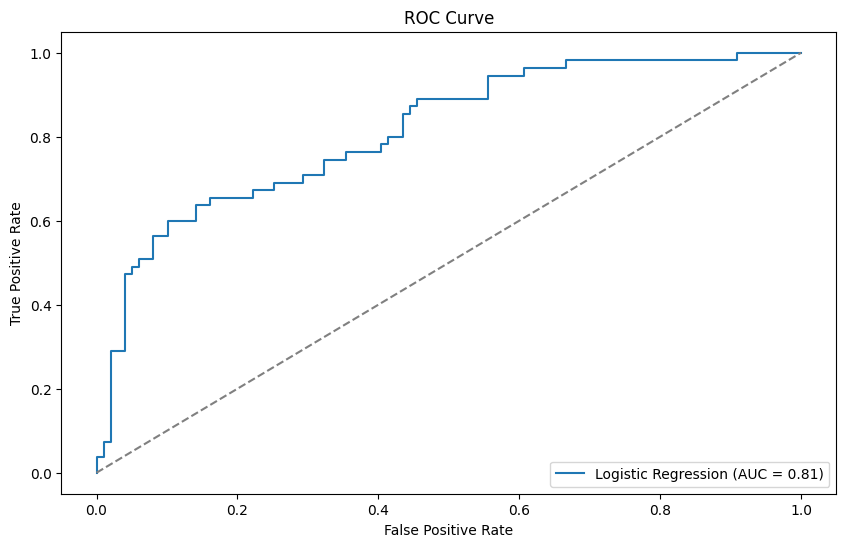

In [30]:
# Obtain the class membership probabilities
y_prob = logreg.predict_proba(X_test_d)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_d, y_prob)

# Calculate the AUC (Area Under the Curve)
auc = roc_auc_score(y_test_d, y_prob)
print(f"AUC: {auc}")

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()